In this notebook, we will plot the results of the experiments comparing the LCEGP w/
lookahead PCS with the alternative contextual RS algorithms from the literature.

### Our method is so much slower!!
- Also doing much worse

### LCEGP does not use Standardize here. Any luck that has to do with something?

# Empirical PCS is plotted below as well.

# Some weird behavior was observed with the posterior, such as arms being identical to each other in LCEGP posterior.

In [1]:
import json
import os

import torch
from torch import Tensor

%matplotlib inline
import matplotlib.pyplot as plt

# current_dir = os.path.dirname(os.path.abspath(__file__))
current_dir = os.getcwd()


def plot_experiment(
    dirname: str, plot_idcs: list = None, empirical_pcs: bool = False
) -> Tensor:
    exp_dir = os.path.join(current_dir, dirname)
    config_path = os.path.join(exp_dir, "config.json")

    with open(config_path, "r") as f:
        config_dict = json.load(f)
        print(f"Config: \n {json.dumps(config_dict, indent=4)}")

    # get all the output files
    directory_list = os.listdir(exp_dir)
    output_files = [
        os.path.join(exp_dir, file) for file in directory_list if file[-3:] == ".pt"
    ]

    # read all outputs into a list
    output_dicts = list()
    for file_path in output_files:
        output_dicts.append(torch.load(file_path))
    output_count = len(output_dicts)
    print(f"Read {output_count} output files.")
    labels = output_dicts[0]["labels"]
    label_count = len(labels)

    # plot final values, averaged over replications.
    # final values is a list of tensors, one tensor per label
    if empirical_pcs:
        key = "correct_selection"
    else:
        key = "pcs_estimates"
    final_value_shape = output_dicts[0][key][0].shape
    all_results = torch.zeros(label_count, output_count, *final_value_shape)

    for j, out_dict in enumerate(output_dicts):
        for i in range(label_count):
            all_results[i, j] = out_dict[key][i].cpu()

    # average to get the plot values
    if empirical_pcs:
        # treating it as the expected PCS for now.
        plot_values = all_results.mean(dim=1).mean(dim=-1)

    else:
        plot_values = all_results.mean(dim=1)

    # plot
    fig = plt.figure(figsize=(12, 8))
    fig.patch.set_facecolor('xkcd:mint green')
    if plot_idcs is None:
        plot_idcs = list(range(label_count))

    for i in plot_idcs:
        plt.plot(plot_values[i], label=labels[i])
    plt.grid()
    plt.legend()
    plt.show()
    return all_results


# _ = plot_experiment("config_0", empirical_pcs=True)


Config: 
 {
    "iterations": 100,
    "fit_frequency": 5,
    "num_arms": 4,
    "num_contexts": 4,
    "obs_noise": 5.0
}
Read 50 output files.


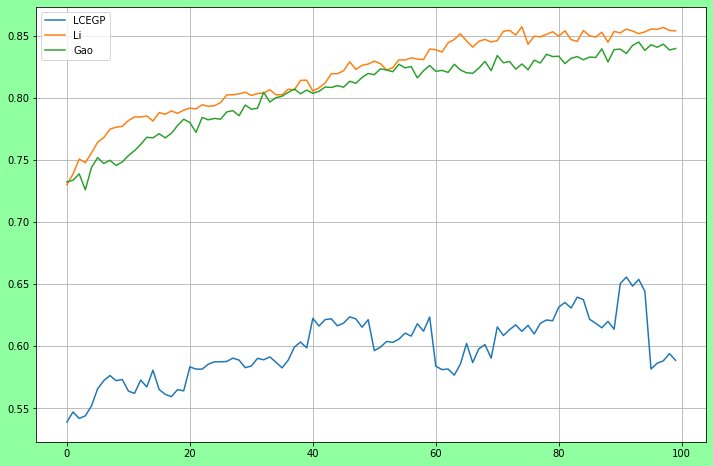

In [2]:
_ = plot_experiment("config_0")

Config: 
 {
    "iterations": 200,
    "fit_frequency": 5,
    "num_arms": 6,
    "num_contexts": 8,
    "obs_noise": 5.0,
    "batch_size": 20,
    "true_mean_scale": 5.0
}
Read 30 output files.


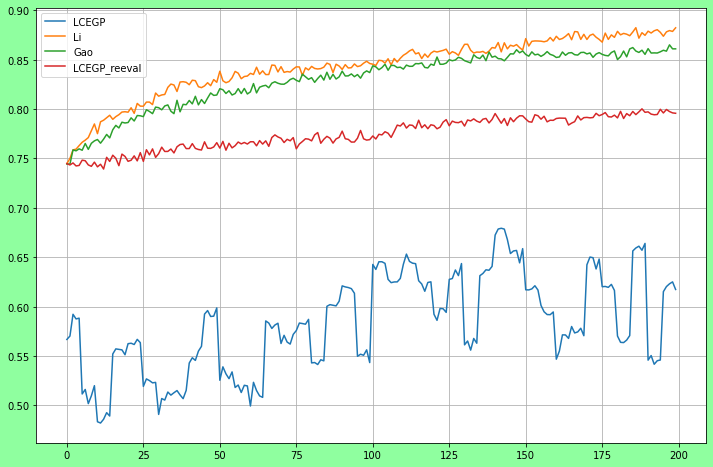

In [3]:
_ = plot_experiment("config_2")

Config: 
 {
    "iterations": 400,
    "fit_frequency": 10,
    "num_arms": 6,
    "num_contexts": 6,
    "obs_noise": 5.0
}
Read 13 output files.


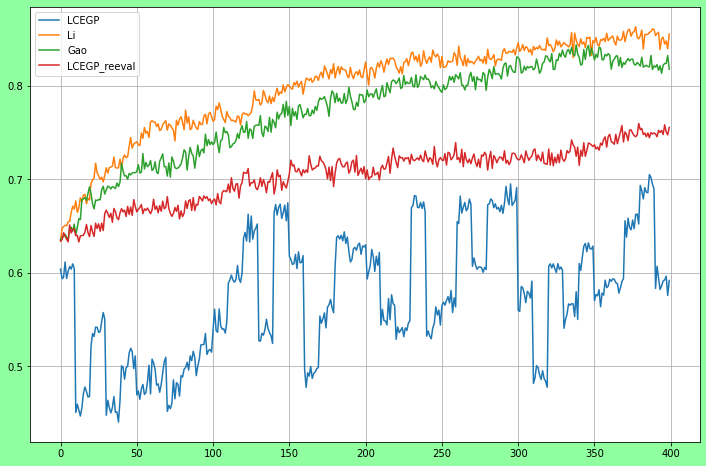

In [4]:
_ = plot_experiment("config_3")

Config: 
 {
    "iterations": 200,
    "fit_frequency": 10,
    "num_arms": 10,
    "num_contexts": 4,
    "obs_noise": 2.0
}
Read 30 output files.


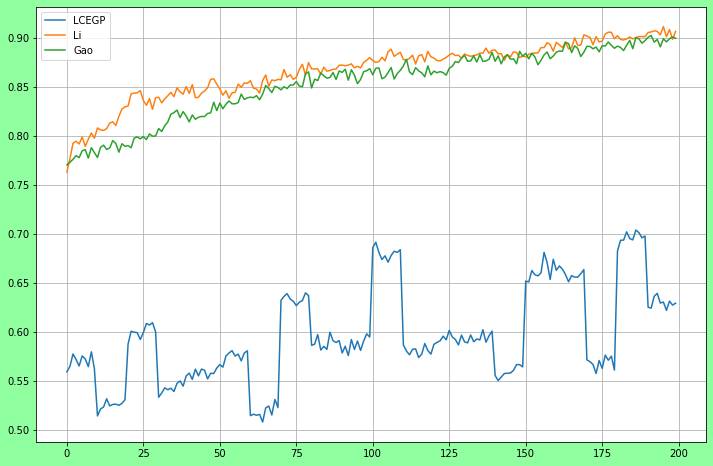

In [5]:
_ = plot_experiment("config_4")

Config: 
 {
    "iterations": 5000,
    "fit_frequency": 10,
    "num_arms": 6,
    "num_contexts": 6,
    "obs_noise": 5.0,
    "skip_lcegp": 1
}
Read 10 output files.


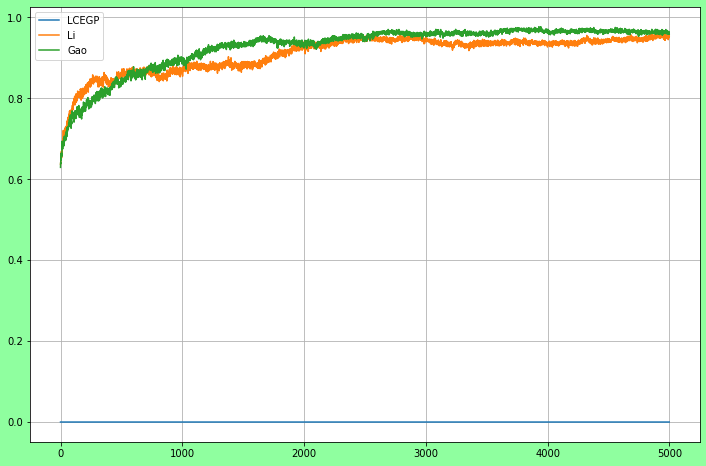

In [6]:
_ = plot_experiment("config_5")

Config: 
 {
    "iterations": 5000,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 4,
    "obs_noise": 5.0,
    "skip_lcegp": 1
}
Read 10 output files.


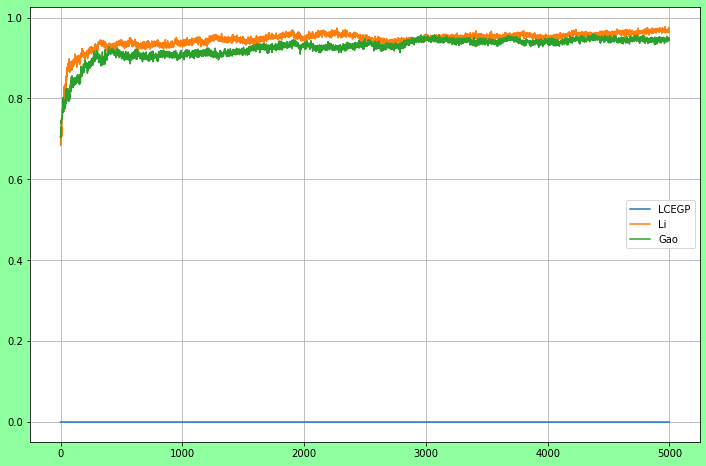

In [7]:
_ = plot_experiment("config_6")

Config: 
 {
    "iterations": 1000,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 4,
    "obs_noise": 5.0,
    "skip_lcegp": 1
}
Read 40 output files.


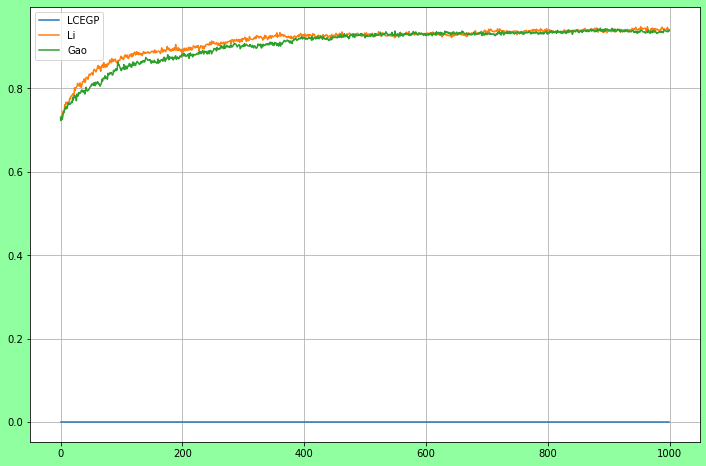

In [8]:
_ = plot_experiment("config_7")

Config: 
 {
    "iterations": 2000,
    "skip_lcegp": 1
}
Read 40 output files.


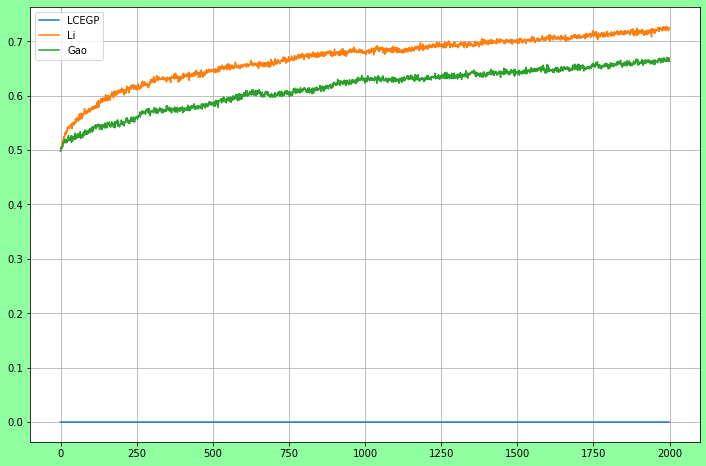

In [9]:
_ = plot_experiment("config_8")

## Plotting empirical PCS here on.

Config: 
 {
    "iterations": 100,
    "fit_frequency": 5,
    "num_arms": 4,
    "num_contexts": 4,
    "obs_noise": 5.0
}
Read 50 output files.


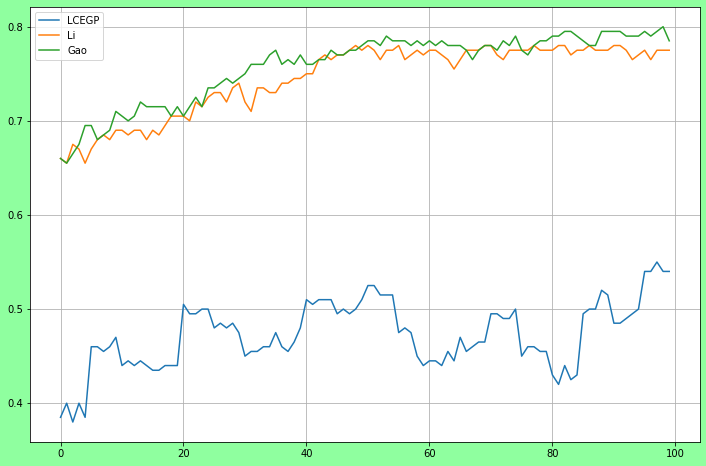

In [10]:
_ = plot_experiment("config_0", empirical_pcs=True)

Config: 
 {
    "iterations": 200,
    "fit_frequency": 5,
    "num_arms": 6,
    "num_contexts": 8,
    "obs_noise": 5.0,
    "batch_size": 20,
    "true_mean_scale": 5.0
}
Read 30 output files.


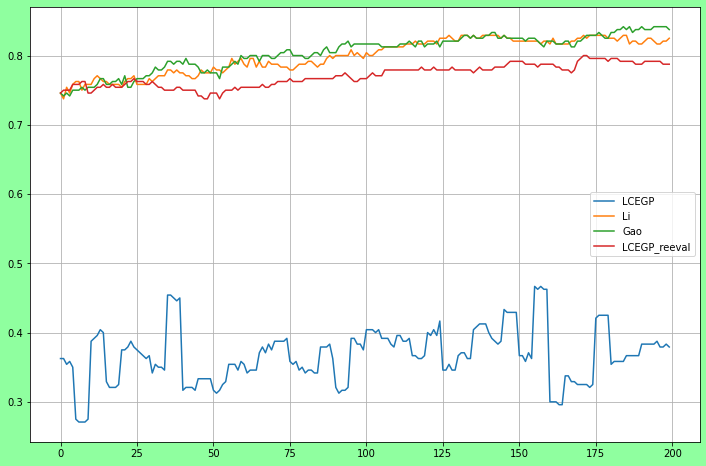

In [11]:
_ = plot_experiment("config_2", empirical_pcs=True)

Config: 
 {
    "iterations": 400,
    "fit_frequency": 10,
    "num_arms": 6,
    "num_contexts": 6,
    "obs_noise": 5.0
}
Read 13 output files.


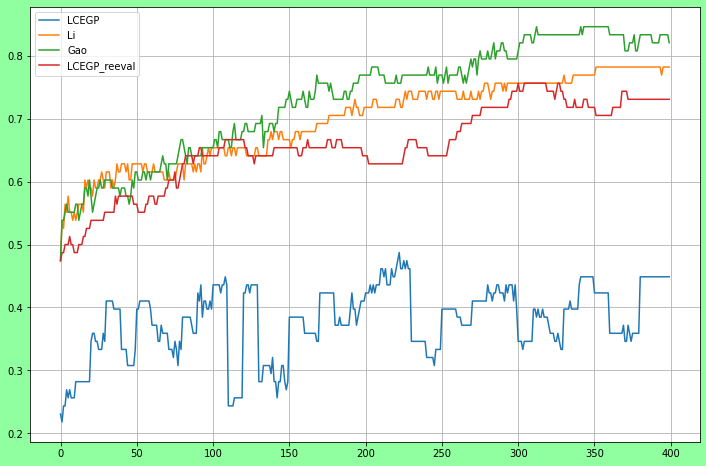

In [12]:
_ = plot_experiment("config_3", empirical_pcs=True)

Config: 
 {
    "iterations": 200,
    "fit_frequency": 10,
    "num_arms": 10,
    "num_contexts": 4,
    "obs_noise": 2.0
}
Read 30 output files.


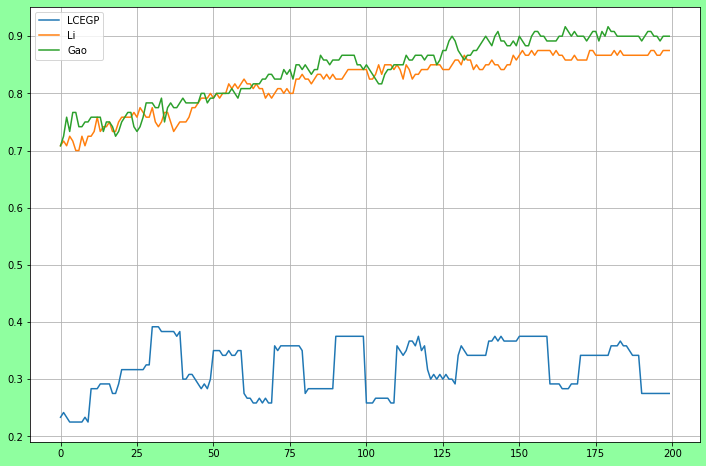

In [13]:
_ = plot_experiment("config_4", empirical_pcs=True)

## This is an additional experiment with Standardize and multiple fit tries.

It suggests that these methods do help with the performance, though it is still lagging
behind the alternatives.

Config: 
 {
    "iterations": 300,
    "fit_frequency": 25,
    "fit_tries": 10,
    "standardize": 1,
    "num_arms": 4,
    "num_contexts": 4,
    "obs_noise": 5.0
}
Read 30 output files.


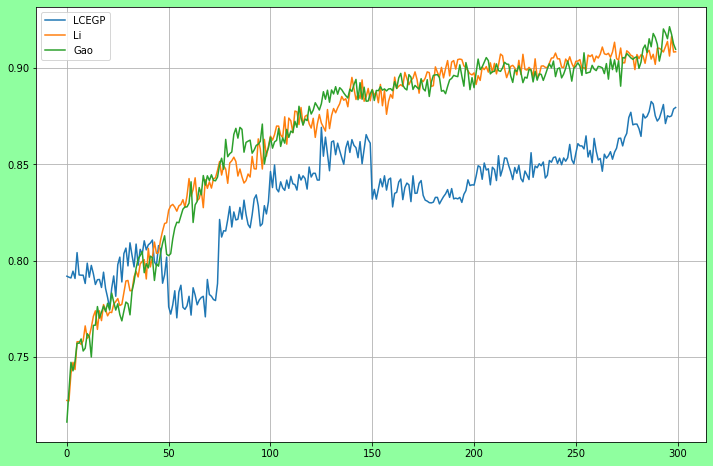

In [16]:
_ = plot_experiment("config_9", empirical_pcs=False)

Config: 
 {
    "iterations": 300,
    "fit_frequency": 25,
    "fit_tries": 10,
    "standardize": 1,
    "num_arms": 4,
    "num_contexts": 4,
    "obs_noise": 5.0
}
Read 30 output files.


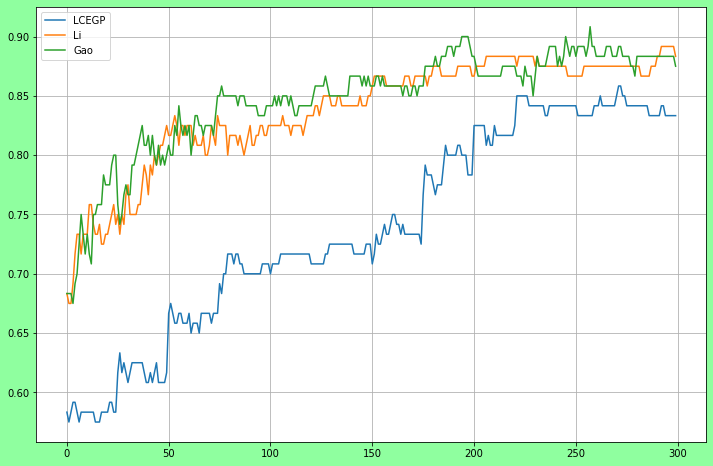

In [17]:
_ = plot_experiment("config_9", empirical_pcs=True)